[Regresja Liniowa Zajecia ZDDATAPOL44.ipynb](https://colab.research.google.com/drive/1duNk2Ga3pp_EJZqw-7GNZGH4M-aPDAta?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import files
# import io

In [1]:
# uploaded = files.upload()

### Gradient Descent (wlasna funkcja)

In [ ]:
# Wczytanie danych
df = pd.read_csv('portland.csv', header=None)
df.columns = (['Size','Bedroom','Price'])
df = df.drop('Bedroom', axis=1)

In [ ]:
df.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


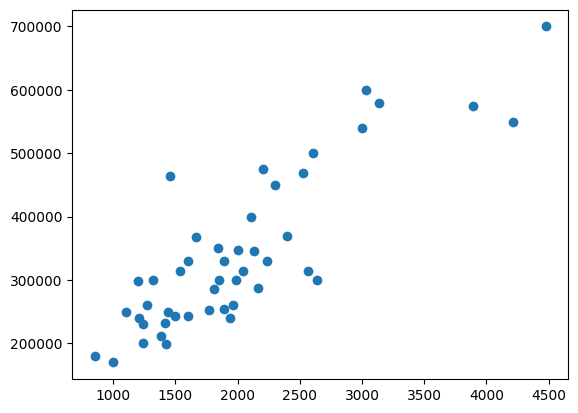

In [ ]:
# Plot
plt.plot(df.Size, df.Price, 'o')
plt.show()

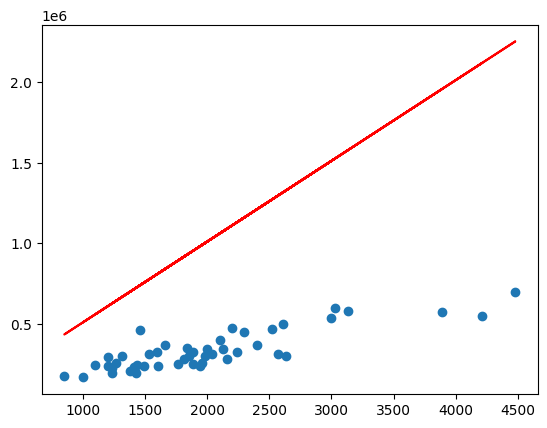

In [ ]:
# Zaczynam od losowych wartosc theta0=10000 i theta1=500
plt.plot(df.Size, df.Price, 'o')
plt.plot(df.Size, 10000 + df.Size*500, 'r')
plt.show()

In [ ]:
# Przyporzadkowanie zmiennej zaleznej i zmiennych niezaleznych
X = df['Size'].values     # Zmienna niezalezna
y = df['Price'].values    # Zmienna zalezna

X = np.column_stack(([1]*len(X), X)) # Technikalia - dodanie kolumny z samymi jedynkami

In [ ]:
def gradientDescent(X, y, theta, alpha, m, numIterations):
  '''
  param: X - zmienne niezalezne
  param: y - zmienna zalezna
  param: theta - macierz [Theta_0 czyli punkt przeciecia, Theta_1 czyli wspolczynnik od X1] STARTOWY PUNKT
  param: alpha - wspolczynnik uczenia - jak duze kroki zrobic
  param: m - liczba obserwacji
  param: numIterations - liczba iteracji naszego modelu - Ile kroków zrobić
  '''
  xTrans = X.transpose()                              # potrzebne do obliczenia gradientów (pochodnej cząstkowej) przez np.dot TECHNIKALIA
  cost_array = np.empty([numIterations, 2])           # pusta macierz do ktorej bede zapisywal wartosc funkcji kosztu po kazdej iteracji (ploty)
  for i in range(0, numIterations):                   # petla
    hypothesis = np.dot(X, theta)                     # bierzemy kazdy x, mnozymy przez Teta_1 i dodajemy Teta_0. Przewiduje cene kazdego domu
    loss = hypothesis - y                             # Odleglosc kropek do lini. Innymi słowy liczymy reszty
    cost = np.sum(loss ** 2) / (2 * m)                # Srednia odleglosc kropek od lini czyli inaczej funkcja kosztu
    print("Iteration %d | Cost: %f" % (i, cost))
    cost_array[i][0] = i                              # do plotowania
    cost_array[i][1] = cost                           # do plotowania
    gradient = np.dot(xTrans, loss) / m               # Pochodna czastkowa funkcji. Matma dla ciekawskich tutaj: https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wyk%C5%82ad_1
    theta = theta - alpha * gradient                  # Aktualizujemy parametry theta o gradient pomnozony przez wspolczynnik uczenia
  return theta, cost_array

In [ ]:
theta = [10000, 500]
alpha = 0.000000005
m = len(X)
numIterations = 200

In [ ]:
 theta, cost_array = gradientDescent(X, y, theta, alpha, m, numIterations)

Iteration 0 | Cost: 267741064861.776581
Iteration 1 | Cost: 255617574389.728302
Iteration 2 | Cost: 244047819362.507568
Iteration 3 | Cost: 233006508141.243988
Iteration 4 | Cost: 222469504272.278473
Iteration 5 | Cost: 212413773724.553070
Iteration 6 | Cost: 202817334536.912323
Iteration 7 | Cost: 193659208765.242065
Iteration 8 | Cost: 184919376624.404266
Iteration 9 | Cost: 176578732724.719666
Iteration 10 | Cost: 168619044307.330322
Iteration 11 | Cost: 161022911387.146088
Iteration 12 | Cost: 153773728716.244965
Iteration 13 | Cost: 146855649484.579254
Iteration 14 | Cost: 140253550678.637482
Iteration 15 | Cost: 133953000022.335266
Iteration 16 | Cost: 127940224427.866974
Iteration 17 | Cost: 122202079887.552002
Iteration 18 | Cost: 116726022740.858917
Iteration 19 | Cost: 111500082253.795715
Iteration 20 | Cost: 106512834450.725739
Iteration 21 | Cost: 101753377141.404739
Iteration 22 | Cost: 97211306088.647186
Iteration 23 | Cost: 92876692264.525208
Iteration 24 | Cost: 8874006

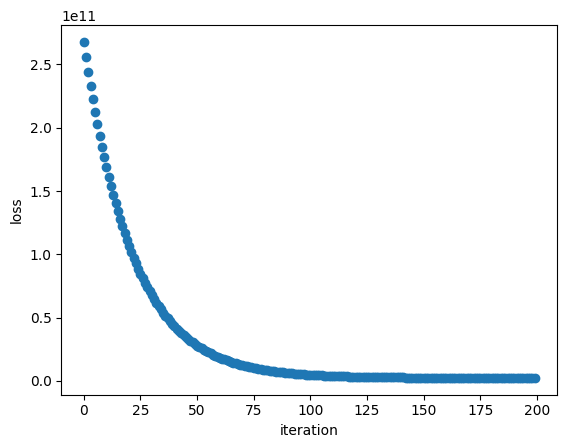

In [ ]:
epoch = range(len(cost_array[:, 0]))
plt.plot(epoch,cost_array[:, 1],'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [ ]:
theta

array([9999.86281108,  164.21426135])

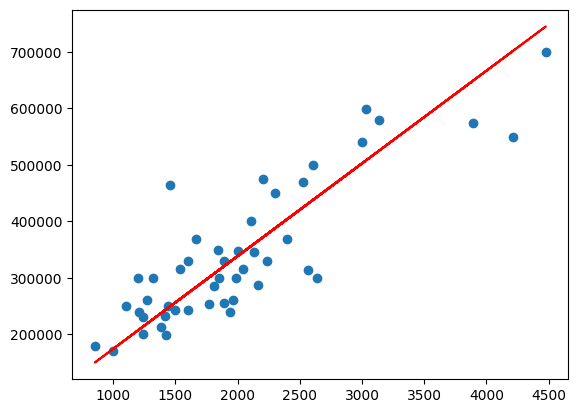

In [ ]:
# Koncowy model
plt.plot(df.Size, df.Price, 'o')
plt.plot(df.Size, theta[0] + df.Size*theta[1], 'r')
plt.show()

In [ ]:
# y = theta[0] + theta[1]*x

In [ ]:
predicted_price = theta[0] + theta[1]*3200
predicted_price

535485.499132295

### Scikit Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Wczytanie danych
df = pd.read_csv('portland.csv', header=None)
df.columns = (['Size','Bedroom','Price'])

In [ ]:
# Zmienne zalezne i niezalezne

X = df[['Size', 'Bedroom']]     # Zmienne niezalezne
y = df['Price']                 # Zmienna zalezna

$y = \Theta _{0} + \Theta _{1}X_{1} + \Theta _{2}X_{2}$,

In [ ]:
reg = LinearRegression().fit(X,y)

In [ ]:
# Wypisac wspolczynniki regresji:

print(reg.intercept_)
print(reg.coef_)

89597.90954279754
[  139.21067402 -8738.01911233]


In [ ]:
# Dokonanie predykcji dla domu o pow. 3200stop^2 i 4 sypialnie

reg.predict([[3200, 4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([500119.98994989])